<a href="https://colab.research.google.com/github/AlifiyulAkyun/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Nama     : Alifiyul Akyun
*   Kelas    : TI-3B
*   No Absen : 04
*   NIM      : 2041720036



# **TUGAS PRAKTIKUM**

*   Gamma Correction




### 1. Buat Gamma Correction sesuai dengan petunjuk

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


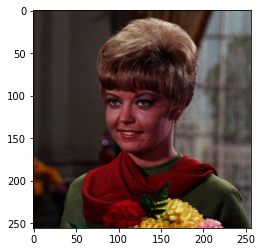

In [4]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Gamma Correction pada citra 
------------------------------
Masukkan nilai Gamma: 3


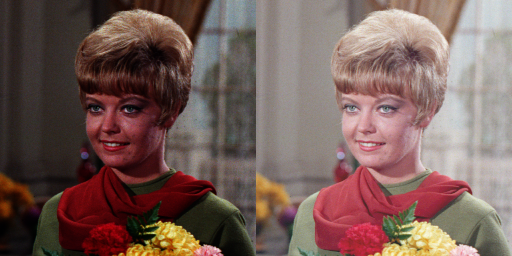

In [5]:
original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255);


final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth

 Simulasi Image Depth 
----------------------------------


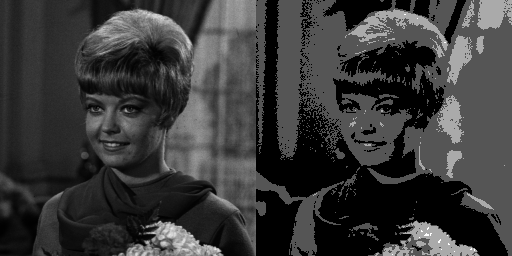

In [6]:
# Tugas 2 : Buat Simulasi Image Depth 

print(' Simulasi Image Depth ')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape, original.dtype)

# nilai kedalaman
depth=2

# Rumus menentukan level kedalaman
level = 255 / ((2**depth) - 1)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  # Rumus Bit Depth
  img_depth[y] = np.clip(np.round(original[y]/level)*level, 0, 255)

final_frame = cv.hconcat((original, img_depth))
cv2_imshow(final_frame)

## 3. Buat modul Average Denoising

Citra di Average 5

Nilai Psnr adalah 27.525419966753383 (dB)


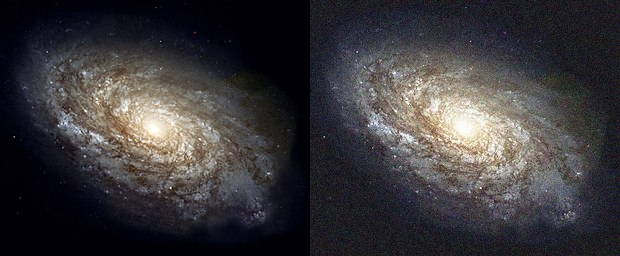

In [7]:
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/image/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/image/noises-20230223T140529Z-001/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 5 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):   
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai Psnr adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.517914371743103 (dB)


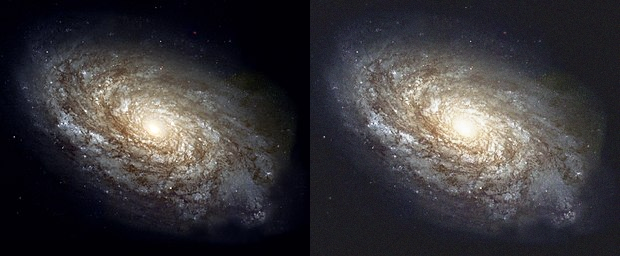

In [8]:

# Jumlah average 30
dst = cv_img[0]
noise_number = 30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.496592874343953 (dB)


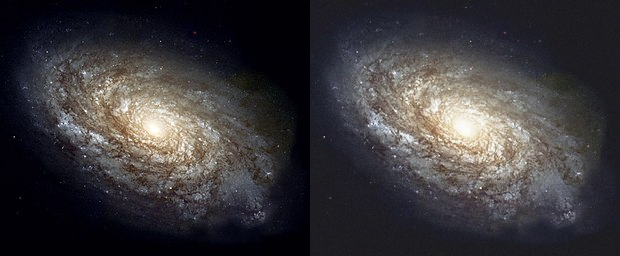

In [9]:

# Jumlah average 60
dst = cv_img[0]
noise_number = 60 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.509404099337054 (dB)


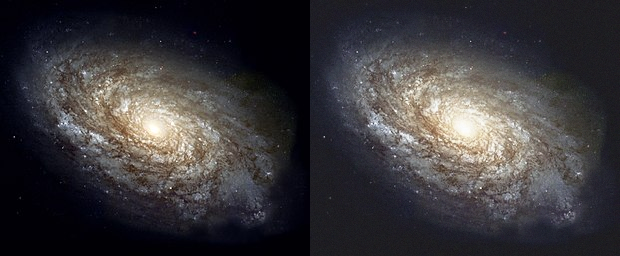

In [10]:
# Jumlah average 80
dst = cv_img[0]
noise_number = 80 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50290283472454 (dB)


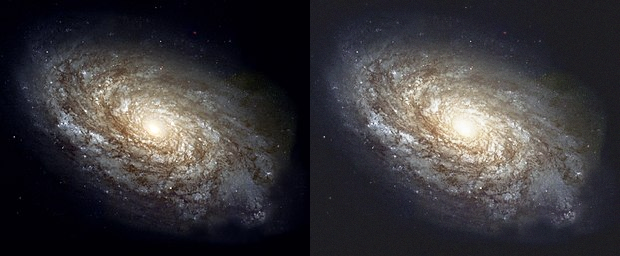

In [11]:
# Jumlah average 100
dst = cv_img[0]
noise_number = 100 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)
     

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

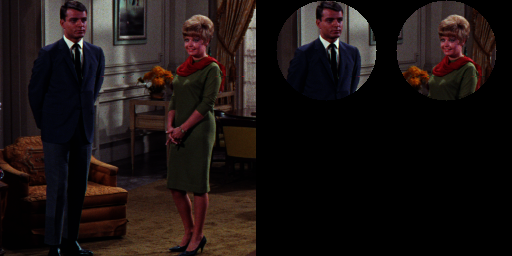

In [13]:
# soal no 4 menggunakan operator and
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')
mask = np.zeros(img3.shape, dtype=np.uint8)

mask = cv.circle(mask,center=(70,50),radius=50,color=(255,255,255),thickness=-1)
result = img3 & mask

mask1 = cv.circle(mask,center=(190,50),radius=50,color=(255,255,255),thickness=-1)
result1 = img3 & mask1

final_frame = cv.hconcat((img3, result1))
cv2_imshow(final_frame)
     

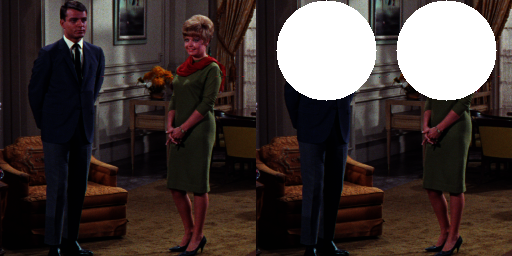

In [14]:

# Operator OR
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')
mask = np.zeros(img3.shape, dtype=np.uint8)

mask = cv.circle(mask,center=(70,50),radius=50,color=(255,255,255),thickness=-1)
result = img3 | mask

mask1 = cv.circle(mask,center=(190,50),radius=50,color=(255,255,255),thickness=-1)
result1 = img3 | mask1

final_frame = cv.hconcat((img3, result1))
cv2_imshow(final_frame)

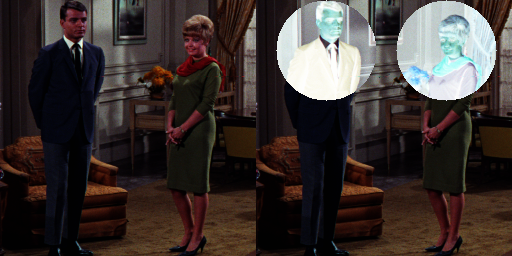

In [15]:
# Operator NOT
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')
mask = np.zeros(img3.shape, dtype=np.uint8)

mask = cv.circle(mask,center=(70,50),radius=50,color=(255,255,255),thickness=-1)
result = img3 ^ mask

mask1 = cv.circle(mask,center=(190,50),radius=50,color=(255,255,255),thickness=-1)
result1 = img3 ^ mask1

final_frame = cv.hconcat((img3, result1))
cv2_imshow(final_frame)


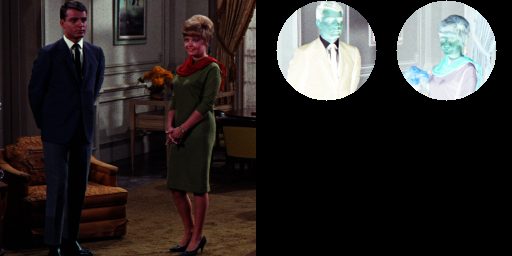

In [16]:
# Operator NAND
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')
mask = np.zeros(img3.shape, dtype=np.uint8)

mask = cv.circle(mask,center=(70,50),radius=50,color=(255,255,255),thickness=-1)
result = ~img3 & mask

mask1 = cv.circle(mask,center=(190,50),radius=50,color=(255,255,255),thickness=-1)
result1 = ~img3 & mask1

final_frame = cv.hconcat((img3, result1))
cv2_imshow(final_frame)

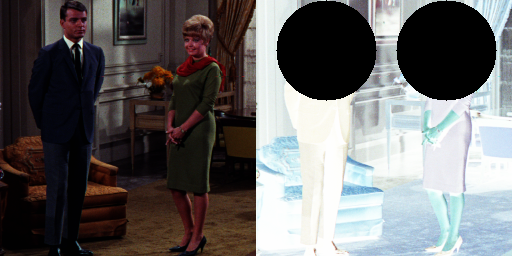

In [17]:
# Operator XOR
img3 = cv.imread('/content/drive/MyDrive/PCVK/image/couple.tiff')
mask = np.zeros(img3.shape, dtype=np.uint8)

mask = cv.circle(mask,center=(70,50),radius=50,color=(255,255,255),thickness=-1)
result = ~img3 & ~mask

mask1 = cv.circle(mask,center=(190,50),radius=50,color=(255,255,255),thickness=-1)
result1 = ~img3 & ~mask1

final_frame = cv.hconcat((img3, result1))
cv2_imshow(final_frame)